In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
from pathlib import Path
import pandas as pd

# Define dataset paths
train_path = Path(r"C:\Users\Aniketha Prasad\Downloads\archive\train")
test_path = Path(r"C:\Users\Aniketha Prasad\Downloads\archive\test")

# Function to get image paths and labels
def get_image_data(folder):
    return [(str(img), img.parent.name) for img in folder.rglob("*.[jp][pn]g")]

# Create DataFrames
train_df = pd.DataFrame(get_image_data(train_path), columns=['image_path', 'label'])
test_df = pd.DataFrame(get_image_data(test_path), columns=['image_path', 'label'])

# Display sample data
print("Train Dataset:\n", train_df.head())
print("Test Dataset:\n", test_df.head())


Train Dataset:
                                           image_path  label
0  C:\Users\Aniketha Prasad\Downloads\archive\tra...  train
1  C:\Users\Aniketha Prasad\Downloads\archive\tra...  train
2  C:\Users\Aniketha Prasad\Downloads\archive\tra...  train
3  C:\Users\Aniketha Prasad\Downloads\archive\tra...  train
4  C:\Users\Aniketha Prasad\Downloads\archive\tra...  train
Test Dataset:
                                           image_path label
0  C:\Users\Aniketha Prasad\Downloads\archive\tes...  test
1  C:\Users\Aniketha Prasad\Downloads\archive\tes...  test
2  C:\Users\Aniketha Prasad\Downloads\archive\tes...  test
3  C:\Users\Aniketha Prasad\Downloads\archive\tes...  test
4  C:\Users\Aniketha Prasad\Downloads\archive\tes...  test


In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Function to load images and convert them to arrays
def load_images(image_paths, target_size=(224, 224)):
    return np.array([img_to_array(load_img(path, target_size=target_size)) / 255.0 for path in image_paths])

# Load images and labels
X_train = load_images(train_df['image_path'].values)
X_test = load_images(test_df['image_path'].values)
y_train = train_df['label'].values
y_test = test_df['label'].values

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Train set: {X_train.shape}, Labels: {len(y_train)}")
print(f"Validation set: {X_val.shape}, Labels: {len(y_val)}")
print(f"Test set: {X_test.shape}, Labels: {len(y_test)}")


Train set: (5199, 224, 224, 3), Labels: 5199
Validation set: (1300, 224, 224, 3), Labels: 1300
Test set: (2786, 224, 224, 3), Labels: 2786


In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Combine train and test labels before fitting
all_labels = np.concatenate([y_train, y_test])

# Encode all labels to ensure consistency
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform train and test labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))


In [30]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(2, activation='softmax')
 ])

In [31]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 51,672,610 (197.12 MB)

 Trainable params: 51,670,690 (197.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [32]:
 history = model.fit(X_train, y_train,
                       batch_size=128,
                       epochs=10,
                       validation_split=0.2,
                       verbose=1)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5193s 161s/step - accuracy: 0.6009 - loss: 1.2134 - val_accuracy: 0.0000e+00 - val_loss: 8.4509
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 495s 15s/step - accuracy: 0.9225 - loss: 0.3200 - val_accuracy: 0.0817 - val_loss: 24.7058
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 526s 16s/step - accuracy: 0.9965 - loss: 0.0818 - val_accuracy: 0.6846 - val_loss: 7.3739
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 513s 15s/step - accuracy: 0.9985 - loss: 0.0322 - val_accuracy: 0.7471 - val_loss: 4.4165
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5193s 162s/step - accuracy: 0.9996 - loss: 0.0159 - val_accuracy: 0.6827 - val_loss: 1.6732
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 400s 12s/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.8221 - val_loss: 0.8994
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 528s 16s/step - accuracy: 0.9999 - loss: 0.0065 - val_accuracy: 0.9567 - val_loss: 0.1675
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2629s 82s/step - accuracy: 0.9995 - loss: 0.0052 - val_ac

In [29]:
print(np.unique(y_train))
print(np.unique(y_test))


[0. 1.]
[0. 1.]


In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.1213
Test loss: 26.2890


In [37]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("\nClassification Report:")
class_names = ['0', '1']
print(classification_report(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1),target_names=class_names))

88/88 ━━━━━━━━━━━━━━━━━━━━ 54s 613ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22      2786
           1       0.00      0.00      0.00         0

    accuracy                           0.12      2786
   macro avg       0.50      0.06      0.11      2786
weighted avg       1.00      0.12      0.22      2786



C:\Users\Aniketha Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aniketha Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aniketha Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

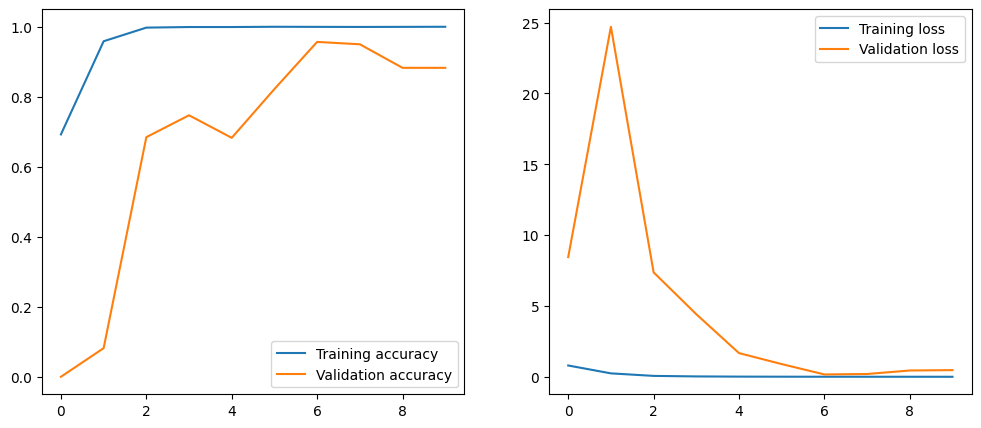

In [38]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()